---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup & Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 2<br>
        <span style="float: right;">SS 2025</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 5</span><br>
     Themen: Dimensionsreduktionsverfahren, k-Means Clustering<br>
     Abgabetermin: 12.06.2024, 23:59 Uhr<br>
     Punkte: 30
</p>


---

**Namen:** Emelie Hauck, Conrad Christoph

---

## Aufgabe 1 [16 Punkte]

### Daten

Der Datensatz `fashion-mnist` ist ein von Zalando bereitgestellter Datensatz und enthält Bilder von Kleidungsstücken aus 10 verschiedenen Kategorien (https://github.com/zalandoresearch/fashion-mnist).

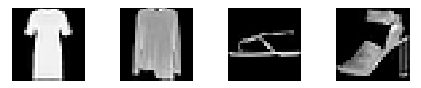


Der Datensatz besteht aus einem Trainigsdatensatz mit 60.000 Bildern und einem Testdatensatz mit 10.000 Bildern. Jedes Bild ist ein grauskaliertes 28x28 Bild und die 10 Klassen sind mit 0 bis 9 codiert. 
Die Codierung ist in der nachfolgenden Tabelle angegeben:

|Label| Description|
| --- | --- |
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

Der _fashion-minst_ Datensatz ist enthalten in der Biliothek `torchvision` und kann mittels `torchvision.datasets.FashionMNIST` aufgerufen werden.

### Methode: Hauptkomponentenanalyse
In dieser Aufgaben sollen Sie eine Hauptkomponentenanalyse (PCA) auf den obigen Datensatz anwenden. Bei der Hauptkomponentenanalyse werden die Input-Feature in neue Feature, die Hauptkomponenten, linear transformiert. Die Hauptkomponenten sind dabei so gewählt, dass diese alle senkrecht aufeinander stehen, sie sind also unkorreliert zueinander. Die Informationen, welche die Hauptkomponenten tragen, sind also anschaulich nicht voneinander abhängig. Desweiteren werden die Hauptkomponenten so konstruiert, dass die erste Hauptkomponente die größte Variation der Daten wiederspiegelt (sie enthält also die meiste Information), die zweite Hauptkomponente die zweitgrößte Variation (zweit meisten Informationen) usw.. Durch diese Eigenschaft wird die Hauptkomponentenanalyse auch für die Dimensionsreduktion der Input-Feature verwendet. Anstatt alle Input-Feature zu nehmen, kann man auch nur die ersten $n$ Hauptkomponenten als Inputs wählen, da diese den Großteil der Informationen der Daten enthalten.



### Aufgabe
Laden Sie dazu jeweils den Trainingsdatensatz  und den Testdatensatz in die Variablen `train_data` und `test_data`. Benutzen Sie dabei auch den folgenden angegebenen Transformer. Achtung: Sie müssen noch den Pfad "download_data_to_folder" angeben, in welchen die Daten geladen werden sollen:<br><br>
```python
#### Load data ####
download_data_to_folder = ....

transformer = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(0.5, 0.5)
])

train_data = torchvision.datasets.FashionMNIST(download_data_to_folder, train=True, download=True, transform=transformer)
test_data = torchvision.datasets.FashionMNIST(download_data_to_folder, train=False, download=True, transform=transformer)
```
<br>

1. In PyTorch können Sie mittels der Funktion `torch.pca_lowrank` eine Hauptkomponentenanalyse durchführen. Dabei werden die Matrizen, welche für die lineare Transformation benötigt werden berechnet und ausgegeben. Informieren Sie sich genauer über die Funktionsweise dieser Funktion und führen dann eine Hauptkomponentenanalyse auf den Trainingsdaten durch. Visualisieren Sie die Daten in einem 2D-Scatterplot der ersten beiden Hauptkomponenten. Erkennen Sie irgendwelche Muster?

1. Visualisieren Sie den Anteil der erklärten Varianz in Bezug auf die verwendete Anzahl an Hauptkomponenten. Wieviele Hauptkomponenten brauchen Sie um 90% der Varianz zu behalten (zu erklären)?

1. Trainieren Sie das unten definierte Neuronale Netz einmal für die reduzierten Daten (Input sind die in 2. ermittelten Hauptkomponenten, welche 90% der Varianz beschreiben) und die original Daten unter Berücksichtigung der vordefinierten Parameter und Funktionen sowie des Optimizers SGD. Messen Sie jeweils die Dauer des Trainings über 20 Epochen. Was sind Loss und Accuracy auf dem Testdatensatz? _Hinweis_: Um die vordfinierten Funktionen `train()` und `test()` anwenden zu können, müssen Sie die Daten (insb. den Output der PCA) in einen DataLoader transformieren. Sie können dafür die Funktion `toDataLoader()` nutzen.


1. Sie können die Matrizen aus der Funktion `torch.pca_lowrank` auch verwenden, um aus den Hauptkomponenten wieder auf das Originalbild zu schließen. So rekonstruieren Sie das Bild aus weniger Informationen. Rekonstruieren Sie die Bilder für die in der Teilaufgabe 2) ermittele Anzahl an ersten Hauptkomponenten für 90% der Varianz. Visualisieren Sie einige der rekonstruierten Bilder. Sind die Kleidungsstücke zu erkennen?

#### Load packages and set parameter

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import time

plt.style.use('ggplot')

In [2]:
# Define Parameters
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000

learning_rate = 0.01
log_interval = 100

random_seed = 1
torch.manual_seed(random_seed)

#### Predifined Functions

In [3]:
# components and targets to data loader
def toDataLoader(components, targets, test_ind=False):
    batch_size = batch_size_train
    if (test_ind):
        batch_size = batch_size_test
        
    feature_target = torch.utils.data.TensorDataset(components, targets)
    new_loader = torch.utils.data.DataLoader(
      feature_target,
      batch_size=batch_size, shuffle=True)
    
    return new_loader

In [ ]:
# Plot images
# data: Bilddaten in folgendem Format [Anzahl Bilder, Pixel, Pixel]
# n_img: Anzahl an Bildern, die geplottet werden sollen
def plot_images(data, n_img):
  n = n_img # number of images
  start_pos = 0
  plt.figure(figsize=(20,20))
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.tight_layout()
    plt.imshow(data[i+start_pos], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
  plt.show()

In [4]:
# Definition of the net structure
class Net(nn.Module):
    def __init__(self, input_vars):
        super(Net, self).__init__()
        self.input_vars = input_vars
        self.fc1 = nn.Linear(self.input_vars, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, self.input_vars)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [5]:
# Training function for each epoch

def train(epoch, network, train_loader):
  network.train()
  
  # Loop over the batches
  for batch_idx, (data, target) in enumerate(train_loader):
    
    # --- Steps of the training of the net ---
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    
    # --- Output & Evaluation metrics ---
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

In [6]:
# Test function that applies the test set to the trained net

def test(network, test_loader):
  network.eval()
  test_loss = 0
  correct = 0
  
  # Gradient calculation is disabled (as not needed)
  with torch.no_grad():
    
    # Loop over the batches
    for data, target in test_loader:
        
      # --- Prediction and calculation of evaluation metrics ---
      output = network(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
   
  # --- Output ---
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

---

#### Lösung ab hier

#### Load Data

---

## k-Means Clustering

**k-Means Clustering** ist eines der bekanntesten Clusterverfehren. Für eine gegebene natürliche Zahl $k$ findet der Algorithmus $k$ Cluster indem er die $k$ Clustermittelpunkte, die so genannten **Zentroide (centrooids)** mittels eines iterativen Verfahrens identifiziert. Die Zentroide definieren die Cluster, indem ein Datenpunkt demjenigen Cluster zugeordent wird, zu dessen Zentroid er den geringsten Abstand hat.

Detailliertere Informationen zum k-Means Clustering in der Vorlesung.

#### PyTorch

In PyTorch ist k-Means im dem Paket `kmeans_pytorch` implementiert. https://github.com/subhadarship/kmeans_pytorch/

_Installation_: `$ pip install kmeans-pytorch`

Die Funktion `kmeans_pytorch.kmeans(X=, num_clusters=, distance='euclidean')` führt für eine angegebene Anzahl an Clustern $num\_clusters$ auf der flachen Tabelle $X$ ein k-means Clustering durch. Dabei sind die Zeilen die Samples und die Spalten die unterschiedlichen Variablen. Über die Option `distance=` können unterschiedliche Metriken angegeben werden. Der Default ist die euklidische Metrik.

_Output_: Als Output gibt die Funktion einen Tensor der Clusterzugehörigkeit für jeden Datenpunkt zurück, sowie die Koordinaten der Zentroide.

## Aufgabe 2 [14 Punkte]


1. Führen Sie ein k-means Clustering für `num_clusters=10` auf den Originaldaten (Trainingsdaten) des FashionMNIST Datensatzes durch. Wie groß sind die einzelnen Cluster (wie viele Sample sind in den einzelnen Clustern)?

1. Die Zentroide sind die Repräsentanten der Cluster. Plotten Sie die Bilder der Zentroide. Transformieren Sie dazu zuerst die Zentroide zurück in 28x28 Format. D.h. in einen 3-dimensionalen Tensor der Größe `torch.Size([10, 28, 28])`. Wenden Sie dann die Funktion `plot_images` darauf an. Welche unterschiedlichen Objekte hat der Algorithmus gefunden?

1. Führen Sie nun nochmal ein k-means Clustering für `num_clusters=4` bzw. `num_clusters=12` durch. Wie sehen die gefundenen Objekte nun aus?

1. Führen Sie ein k-means Clustering für `num_clusters=10` auf den in Aufgabe 1 durch PCA reduzierte Daten durch (auf den gefundenen Hauptkomponenten, dei 90% der Varianz beschreiben) des FashionMNIST Datensatzes durch. Vergleichen Sie das Clustering mit dem in 1. mittels des Silhoutte-Scores.

#### Lösung ab hier